In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import gurobipy as gp
from gurobipy import GRB
import itertools
from itertools import combinations
from itertools import permutations
from random import choice
import json
import cvxpy as cp
from tkinter import _flatten
import copy
import time
import scipy.stats as stats

In [2]:
np.random.seed(1)
random.seed(1)

In [3]:
raw_jd_choice = pd.read_excel('data_processing/choices.xlsm')  
offertimes = raw_jd_choice.groupby('clickset')['clicknum'].sum()[raw_jd_choice.clickset.unique()]
offertimes.to_csv('offertimes.csv')
inc_prod_num = raw_jd_choice['clickset'].value_counts()[raw_jd_choice.clickset.unique()]
inc_prod_num.to_csv('inc_prod_num.csv')
choice_prob = raw_jd_choice['clicknum'] / raw_jd_choice.groupby('clickset')['clicknum'].transform('sum')
raw_jd_choice['choice prob'] = choice_prob

assortment_info_df = pd.DataFrame({'assortments':raw_jd_choice.clickset.unique(),'offer_times':offertimes,'includ_prod_num':inc_prod_num})

# extended assortments with outside option 
# transfer to list
clickset = raw_jd_choice['clickset']
clickset_list = []
for cset in clickset:
    num_lst = json.loads(cset)
    #clickset_list.append(num_lst+[0])
    clickset_list.append([0]+num_lst)
raw_jd_choice['clickset'] = clickset_list

# all purchase options in each assortment
purchaseset = raw_jd_choice['purchaseset']
purchaseset_list = []
for pset in purchaseset:
    num_lst = json.loads(pset)
    purchaseset_list.append(num_lst)
raw_jd_choice['purchaseset'] = purchaseset_list

purchasenum_list = raw_jd_choice['clicknum'].tolist()
jd_choice=pd.DataFrame({'clickset':clickset_list,'purchaseset':purchaseset_list,'purchasenum':purchasenum_list,'choice prob':choice_prob})

n = 9 # product size top 8 products and outside option
print('there are {} different products'.format(n))
collection = []
for cset in clickset_list:
    if cset not in collection:
        collection.append(cset)
print('there are {} different assortments'.format(len(collection)))

assortment_info_df['assortments'] = collection
choice_collection = np.zeros((n,len(collection)))
global_num = 0
for i in range(len(collection)):
    local_num =0
    while(local_num < inc_prod_num[i]):
        if purchaseset_list[global_num][0] in collection[i]:
            choice_collection[purchaseset_list[global_num][0]][i] = choice_prob[global_num]
            global_num = global_num +1
            local_num = local_num +1
        else:
            print('error!')
full_choice_collection = pd.DataFrame(choice_collection)
full_choice_collection.to_csv('instances/full_instances/full_choice.csv')


there are 9 different products
there are 134 different assortments


In [154]:
assortment_info_df_20 = assortment_info_df[(assortment_info_df['offer_times']>=20)]
assortments_20 = []
for i in range(len(assortment_info_df_20['assortments'])):
    assortments_20.append(assortment_info_df_20['assortments'][i])


jd_choice_20 = pd.DataFrame(columns=jd_choice.columns)

num = 0
for i in range(len(jd_choice)):
    if jd_choice['clickset'][i] in assortments_20:
        jd_choice_20.loc[num] = jd_choice.loc[i]
        num = num+1 

collection_20 = assortment_info_df_20['assortments']
choice_collection_20 = np.zeros((n,len(collection_20)))

frequency_collection_20 = np.zeros((n,len(collection_20)))

purchaseset_list_20 = jd_choice_20['purchaseset'].tolist()

inc_prod_num_20 = assortment_info_df_20['includ_prod_num']
choice_prob_20 = jd_choice_20['choice prob']
frequency_20 = jd_choice_20['purchasenum']

global_num = 0
for i in range(len(collection_20)):
    local_num =0
    while(local_num < inc_prod_num_20[i]):
        if purchaseset_list_20[global_num][0] in assortments_20[i]:
            choice_collection_20[purchaseset_list_20[global_num][0]][i] = choice_prob_20[global_num]
            frequency_collection_20[purchaseset_list_20[global_num][0]][i] = frequency_20[global_num]
            global_num = global_num +1
            local_num = local_num +1
        else:
            print(purchaseset_list_20[global_num])
            print(assortments_20[i])
            print('error!')
            break
#print(global_num)  

choice_check_20 = pd.DataFrame(choice_collection_20)
choice_check_20.to_csv('instances/full_instances/full_20.csv')
frequency_collection_20 = frequency_collection_20.astype(int)
frequency_check_20 = pd.DataFrame(frequency_collection_20)
frequency_check_20.to_csv('instances/full_instances/frequency_20.csv')

offer_times_20 = assortment_info_df_20['offer_times'].tolist()
print('the number of assortments with at least 20 purchases is',len(assortments_20))

the number of assortments with at least 20 purchases is 29


In [182]:
assortment_info_df_30 = assortment_info_df[(assortment_info_df['offer_times']>=30)]
assortments_30 = []
for i in range(len(assortment_info_df_30['assortments'])):
    assortments_30.append(assortment_info_df_30['assortments'][i])


jd_choice_30 = pd.DataFrame(columns=jd_choice.columns)

num = 0
for i in range(len(jd_choice)):
    if jd_choice['clickset'][i] in assortments_30:
        jd_choice_30.loc[num] = jd_choice.loc[i]
        num = num+1 

collection_30 = assortment_info_df_30['assortments']
choice_collection_30 = np.zeros((n,len(collection_30)))

frequency_collection_30 = np.zeros((n,len(collection_30)))

purchaseset_list_30 = jd_choice_30['purchaseset'].tolist()

inc_prod_num_30 = assortment_info_df_30['includ_prod_num']
choice_prob_30 = jd_choice_30['choice prob']
frequency_30 = jd_choice_30['purchasenum']

global_num = 0
for i in range(len(collection_30)):
    local_num =0
    while(local_num < inc_prod_num_30[i]):
        if purchaseset_list_30[global_num][0] in assortments_30[i]:
            choice_collection_30[purchaseset_list_30[global_num][0]][i] = choice_prob_30[global_num]
            frequency_collection_30[purchaseset_list_30[global_num][0]][i] = frequency_30[global_num]
            global_num = global_num +1
            local_num = local_num +1
        else:
            print(purchaseset_list_30[global_num])
            print(assortments_30[i])
            print('error!')
            break
#print(global_num)  

choice_check_30 = pd.DataFrame(choice_collection_30)
choice_check_30.to_csv('instances/full_instances/full_30.csv')
frequency_collection_30 = frequency_collection_30.astype(int)
frequency_check_30 = pd.DataFrame(frequency_collection_30)
frequency_check_30.to_csv('instances/full_instances/frequency_30.csv')

offer_times_30 = assortment_info_df_30['offer_times'].tolist()
print('the number of assortments with at least 30 purchases is',len(assortments_30))

the number of assortments with at least 30 purchases is 24


In [183]:
assortment_info_df_40 = assortment_info_df[(assortment_info_df['offer_times']>=40)]
assortments_40 = []
for i in range(len(assortment_info_df_40['assortments'])):
    assortments_40.append(assortment_info_df_40['assortments'][i])


jd_choice_40 = pd.DataFrame(columns=jd_choice.columns)

num = 0
for i in range(len(jd_choice)):
    if jd_choice['clickset'][i] in assortments_40:
        jd_choice_40.loc[num] = jd_choice.loc[i]
        num = num+1 

collection_40 = assortment_info_df_40['assortments']
choice_collection_40 = np.zeros((n,len(collection_40)))

frequency_collection_40 = np.zeros((n,len(collection_40)))

purchaseset_list_40 = jd_choice_40['purchaseset'].tolist()

inc_prod_num_40 = assortment_info_df_40['includ_prod_num']
choice_prob_40 = jd_choice_40['choice prob']
frequency_40 = jd_choice_40['purchasenum']

global_num = 0
for i in range(len(collection_40)):
    local_num =0
    while(local_num < inc_prod_num_40[i]):
        if purchaseset_list_40[global_num][0] in assortments_40[i]:
            choice_collection_40[purchaseset_list_40[global_num][0]][i] = choice_prob_40[global_num]
            frequency_collection_40[purchaseset_list_40[global_num][0]][i] = frequency_40[global_num]
            global_num = global_num +1
            local_num = local_num +1
        else:
            print(purchaseset_list_40[global_num])
            print(assortments_40[i])
            print('error!')
            break
#print(global_num)  

choice_check_40 = pd.DataFrame(choice_collection_40)
choice_check_40.to_csv('instances/full_instances/full_40.csv')
frequency_collection_40 = frequency_collection_40.astype(int)
frequency_check_40 = pd.DataFrame(frequency_collection_40)
frequency_check_40.to_csv('instances/full_instances/frequency_40.csv')

offer_times_40 = assortment_info_df_40['offer_times'].tolist()
print('the number of assortments with at least 40 purchases is',len(assortments_40))

the number of assortments with at least 40 purchases is 19


In [184]:
assortment_info_df_50 = assortment_info_df[(assortment_info_df['offer_times']>=50)]
assortments_50 = []
for i in range(len(assortment_info_df_50['assortments'])):
    assortments_50.append(assortment_info_df_50['assortments'][i])


jd_choice_50 = pd.DataFrame(columns=jd_choice.columns)

num = 0
for i in range(len(jd_choice)):
    if jd_choice['clickset'][i] in assortments_50:
        jd_choice_50.loc[num] = jd_choice.loc[i]
        num = num+1 

collection_50 = assortment_info_df_50['assortments']
choice_collection_50 = np.zeros((n,len(collection_50)))

frequency_collection_50 = np.zeros((n,len(collection_50)))

purchaseset_list_50 = jd_choice_50['purchaseset'].tolist()

inc_prod_num_50 = assortment_info_df_50['includ_prod_num']
choice_prob_50 = jd_choice_50['choice prob']
frequency_50 = jd_choice_50['purchasenum']

global_num = 0
for i in range(len(collection_50)):
    local_num =0
    while(local_num < inc_prod_num_50[i]):
        if purchaseset_list_50[global_num][0] in assortments_50[i]:
            choice_collection_50[purchaseset_list_50[global_num][0]][i] = choice_prob_50[global_num]
            frequency_collection_50[purchaseset_list_50[global_num][0]][i] = frequency_50[global_num]
            global_num = global_num +1
            local_num = local_num +1
        else:
            print(purchaseset_list_50[global_num])
            print(assortments_50[i])
            print('error!')
            break
#print(global_num)  

choice_check_50 = pd.DataFrame(choice_collection_50)
choice_check_50.to_csv('instances/full_instances/full_50.csv')
frequency_collection_50 = frequency_collection_50.astype(int)
frequency_check_50 = pd.DataFrame(frequency_collection_50)
frequency_check_50.to_csv('instances/full_instances/frequency_50.csv')

offer_times_50 = assortment_info_df_50['offer_times'].tolist()
print('the number of assortments with at least 50 purchases is',len(assortments_50))

the number of assortments with at least 50 purchases is 15


In [185]:
assortment_info_df_60 = assortment_info_df[(assortment_info_df['offer_times']>=60)]
assortments_60 = []
for i in range(len(assortment_info_df_60['assortments'])):
    assortments_60.append(assortment_info_df_60['assortments'][i])


jd_choice_60 = pd.DataFrame(columns=jd_choice.columns)

num = 0
for i in range(len(jd_choice)):
    if jd_choice['clickset'][i] in assortments_60:
        jd_choice_60.loc[num] = jd_choice.loc[i]
        num = num+1 

collection_60 = assortment_info_df_60['assortments']
choice_collection_60 = np.zeros((n,len(collection_60)))

frequency_collection_60 = np.zeros((n,len(collection_60)))

purchaseset_list_60 = jd_choice_60['purchaseset'].tolist()

inc_prod_num_60 = assortment_info_df_60['includ_prod_num']
choice_prob_60 = jd_choice_60['choice prob']
frequency_60 = jd_choice_60['purchasenum']

global_num = 0
for i in range(len(collection_60)):
    local_num =0
    while(local_num < inc_prod_num_60[i]):
        if purchaseset_list_60[global_num][0] in assortments_60[i]:
            choice_collection_60[purchaseset_list_60[global_num][0]][i] = choice_prob_60[global_num]
            frequency_collection_60[purchaseset_list_60[global_num][0]][i] = frequency_60[global_num]
            global_num = global_num +1
            local_num = local_num +1
        else:
            print(purchaseset_list_60[global_num])
            print(assortments_60[i])
            print('error!')
            break
#print(global_num)  

choice_check_60 = pd.DataFrame(choice_collection_60)
choice_check_60.to_csv('instances/full_instances/full_60.csv')
frequency_collection_60 = frequency_collection_60.astype(int)
frequency_check_60 = pd.DataFrame(frequency_collection_60)
frequency_check_60.to_csv('instances/full_instances/frequency_60.csv')

offer_times_60 = assortment_info_df_60['offer_times'].tolist()
print('the number of assortments with at least 60 purchases is',len(assortments_60))

the number of assortments with at least 60 purchases is 13


In [187]:
assortment_info_df_75 = assortment_info_df[(assortment_info_df['offer_times']>=75)]
assortments_75 = []
for i in range(len(assortment_info_df_75['assortments'])):
    assortments_75.append(assortment_info_df_75['assortments'][i])


jd_choice_75 = pd.DataFrame(columns=jd_choice.columns)

num = 0
for i in range(len(jd_choice)):
    if jd_choice['clickset'][i] in assortments_75:
        jd_choice_75.loc[num] = jd_choice.loc[i]
        num = num+1 

collection_75 = assortment_info_df_75['assortments']
choice_collection_75 = np.zeros((n,len(collection_75)))

frequency_collection_75 = np.zeros((n,len(collection_75)))

purchaseset_list_75 = jd_choice_75['purchaseset'].tolist()

inc_prod_num_75 = assortment_info_df_75['includ_prod_num']
choice_prob_75 = jd_choice_75['choice prob']
frequency_75 = jd_choice_75['purchasenum']

global_num = 0
for i in range(len(collection_75)):
    local_num =0
    while(local_num < inc_prod_num_75[i]):
        if purchaseset_list_75[global_num][0] in assortments_75[i]:
            choice_collection_75[purchaseset_list_75[global_num][0]][i] = choice_prob_75[global_num]
            frequency_collection_75[purchaseset_list_75[global_num][0]][i] = frequency_75[global_num]
            global_num = global_num +1
            local_num = local_num +1
        else:
            print(purchaseset_list_75[global_num])
            print(assortments_75[i])
            print('error!')
            break
#print(global_num)  

choice_check_75 = pd.DataFrame(choice_collection_75)
choice_check_75.to_csv('instances/full_instances/full_75.csv')
frequency_collection_75 = frequency_collection_75.astype(int)
frequency_check_75 = pd.DataFrame(frequency_collection_75)
frequency_check_75.to_csv('instances/full_instances/frequency_75.csv')

offer_times_75 = assortment_info_df_75['offer_times'].tolist()
print('the number of assortments with at least 75 purchases is',len(assortments_75))

the number of assortments with at least 75 purchases is 12


In [149]:
assortment_info_df_100 = assortment_info_df[(assortment_info_df['offer_times']>=100)]
assortments_100 = []
for i in range(len(assortment_info_df_100['assortments'])):
    assortments_100.append(assortment_info_df_100['assortments'][i])

jd_choice_100 = pd.DataFrame(columns=jd_choice.columns)

num = 0
for i in range(len(jd_choice)):
    if jd_choice['clickset'][i] in assortments_100:
        jd_choice_100.loc[num] = jd_choice.loc[i]
        num = num+1 

collection_100 = assortment_info_df_100['assortments']
choice_collection_100 = np.zeros((n,len(collection_100)))

frequency_collection_100 = np.zeros((n,len(collection_100)))

purchaseset_list_100 = jd_choice_100['purchaseset'].tolist()

inc_prod_num_100 = assortment_info_df_100['includ_prod_num']
choice_prob_100 = jd_choice_100['choice prob']
frequency_100 = jd_choice_100['purchasenum']

global_num=0
for i in range(len(collection_100)):
    local_num =0
    while(local_num < inc_prod_num_100[i]):
        if purchaseset_list_100[global_num][0] in assortments_100[i]:
            choice_collection_100[purchaseset_list_100[global_num][0]][i] = choice_prob_100[global_num]
            frequency_collection_100[purchaseset_list_100[global_num][0]][i] = frequency_100[global_num]
            global_num = global_num +1
            local_num = local_num +1

choice_check_100 = pd.DataFrame(choice_collection_100)
choice_check_100.to_csv('instances/full_instances/full_100.csv')
frequency_collection_100 = frequency_collection_100.astype(int)
frequency_check_100 = pd.DataFrame(frequency_collection_100)
frequency_check_100.to_csv('instances/full_instances/frequency_100.csv')

offer_times_100 = assortment_info_df_100['offer_times'].tolist()
print('the number of assortments with at least 100 purchases is',len(assortments_100))

the number of assortments with at least 100 purchases is 11


representability: even for the data set with assortments offered with 100 times, such a data set cannot be representable for the regular model, RUM and MDM cannot represent all the instances above

In [11]:
collection_100 = collection_100.tolist()
''' check regularity '''
flag = 0
for i in range(len(collection_100)):
    for j in range(i+1,len(collection_100)):
        if {*collection_100[i]} <= {*collection_100[j]}:
            for k in collection_100[i]:
                #if k !=0 and choice_collection_100[k][i] < choice_collection_100[k][j]:
                if choice_collection_100[k][i] < choice_collection_100[k][j]:
                    flag = 1
        if {*collection_100[i]} >= {*collection_100[j]}:
            for k in collection_100[j]:
                if choice_collection_100[k][j] < choice_collection_100[k][i]:
                #if k !=0 and choice_collection_100[k][j] < choice_collection_100[k][i]:
                    flag = 1
    if flag == 1:
        break
if flag == 0:
    print('REGULAR')
else:
    print('NOT REGURLAR')

NOT REGURLAR


limit test for MDM, RUM, and MNL

In [12]:
## MDM limit formulation
def row_assortment_data(data,collection):
    pre_data = copy.deepcopy(data)
    
    for j in range(data.shape[0]):
        for i in range(len(collection)):
            if j not in collection[i]:
                pre_data[j][i] = -1
    
    return pre_data

def find_indexes_nonnegative_descending(arr):
    row_indexes_sorted_desc_nonnegative = []
    row_indexes_positive_same_value = []

    for row in arr:
        # Find indexes with non-negative values
        nonnegative_row = row[row >= 0]  # Consider only non-negative values
        unique_elements, unique_indexes = np.unique(nonnegative_row, return_index=True)
        sorted_indexes_desc = np.nonzero(row >= 0)[0][unique_indexes][np.argsort(-unique_elements)]

        row_indexes_sorted_desc_nonnegative.append(sorted_indexes_desc)

        # Keep all indexes of elements with positive and same values
        positive_values = unique_elements[unique_elements > 0]
        positive_same_value_indexes = [np.where(row == val)[0] for val in positive_values if np.count_nonzero(row == val) > 1]
        row_indexes_positive_same_value.append(positive_same_value_indexes)

    return row_indexes_sorted_desc_nonnegative, row_indexes_positive_same_value


In [13]:
def mdm_feasibility(data,ranking,equal):
      
    ub = 100

    model = gp.Model('mdm')
    #model.setParam(gp.GRB.Param.TimeLimit, 60)
    model.setParam('OutputFlag', 0)
    eps = model.addVar(name='eps')
    lam = model.addVars(data.shape[1],name = 'lam')
    
    model.addConstr(eps<=ub ) # just give an upper bound (+ve) for eps, o.w., the problem is unbounded
    
    #for i in range(ranking.shape[0]): # from each product 
    for i in range(len(ranking)): # from each product 
        for j in range(len(ranking[i])-1): # the ranking of assortment in product i 
            model.addConstr(lam [ranking[i][j+1]] - lam[ranking[i][j]]-  eps >=0)
    
    for i in range(len(equal)):
        if len(equal[i])>0:
            for j in range(len(equal[i][0])-1):
                model.addConstr(lam[equal[i][0][j]]-lam[equal[i][0][j+1]]==0)
    
    model.setObjective(eps,GRB.MAXIMIZE)
    model.optimize()
    
     # Access the optimal solution
    if model.status == gp.GRB.OPTIMAL:
        print('Optimal solution found!')
    
    soln = []

    for v in model.getVars():
        soln.append(v.x)

    if (soln[0]>0):
        model.write("mdmfeas_out.sol")
        model.write("mdmfeas_model.lp") 
        return [1,model.Runtime]
    else:
        model.write("mdminfeas_model.lp")
        #return [0, used_time]
        return [0,model.Runtime]
    

In [294]:
def mdm_limit(data, collection,offer_times):
    n, m = data.shape

    prod_in_ass = [[] for _ in range(n)]
    for i, assort in enumerate(collection):
        for j in assort:
            prod_in_ass[j].append(i)

    eps = 0.01

    model = gp.Model()
    model.setParam('OutputFlag', 0)
    lam = model.addVars(m, vtype=GRB.CONTINUOUS, lb=0.0, name="lam")
    x = model.addVars(n, m, vtype=GRB.CONTINUOUS, lb=0.0, name="x")
    delta = model.addVars(m, m, vtype=GRB.BINARY, name="delta")
    
    # Define auxiliary binary variables for absolute value terms
    abs_vars = model.addVars(n, m, vtype=GRB.CONTINUOUS, lb=0.0, name="abs")
    ''' abs_vars = {}
    for i in range(n):
        for j in range(m):
            abs_vars[i, j] = model.addVar(vtype=GRB.CONTINUOUS, name=f"abs_{i}_{j}") '''

    # Add constraints
    for j in range(m):
        model.addConstr(sum(x[i, j] for i in range(n)) == 1, name=f"normalization_{j}")

    for i in range(len(collection)):
        for j in range(n):
            if j not in collection[i]:
                model.addConstr(x[j, i] == 0, name=f"forcing_zero_{j}_{0}")
            else:
                model.addConstr(x[j, i] - data[j, i] <= abs_vars[j, i], name=f"abs_const1_{j}_{i}")
                model.addConstr(-x[j, i] + data[j, i] <= abs_vars[j, i], name=f"abs_const2_{j}_{i}")
    
    for i in range(m):
        model.addConstr(lam[i] <= 1, name=f"lam_bound_{i}")

    for i in range(len(prod_in_ass)):
        #if len(prod_in_ass[i]) > 0:
            for j in prod_in_ass[i]:
                for k in prod_in_ass[i]:
                    #if j != k:
                        model.addConstr(lam[j] - lam[k] + delta[j, k] >= 0, name=f"pro_{i}_aspair_{j}_{k}")
                        model.addConstr(lam[j] - lam[k] - 1 + delta[j, k] + eps * delta[j, k] <= 0,
                                        name=f"pro_{i}_aspair_{j}_{k}")
                        
                        model.addConstr(x[i, j] - x[i, k] - delta[j, k] + 1 >= 0,
                                        name=f"pro_{i}_aspair_{j}_{k}")
                        model.addConstr(x[i, j] - x[i, k] - 1 + delta[k, j] <= 0,
                                        name=f"pro_{i}_aspair_{i}_{j}_{k}")
                        
                        model.addConstr(x[i, j] - x[i, k] + delta[j, k] + delta[k, j] >= 0,
                                        name=f"pro_{i}_aspair_{j}_{k}")
                        model.addConstr(x[i, j] - x[i, k] - delta[j, k] - delta[k, j] <= 0,
                                        name=f"ppro_{i}_aspair_{j}_{k}")

    # Add linear constraints to represent absolute value terms
    ''' for i in range(n):
        for j in range(m):
            model.addConstr(x[i, j] - data[i, j] <= abs_vars[i, j], name=f"abs_const1_{i}_{j}")
            model.addConstr(-x[i, j] + data[i, j] <= abs_vars[i, j], name=f"abs_const2_{i}_{j}") '''

    # Define the modified objective function using auxiliary variables
    obj = (sum(offer_times[j]*data[i, j] * abs_vars[i, j] for i in range(n) for j in range(m)))
    #obj = (sum(offer_times[j]*data[i][j] * abs_vars[i, j] for i in range(n) for j in range(m))/sum(offer_times))

    model.setObjective(obj, GRB.MINIMIZE)

    # Set Gurobi parameters if needed
    model.optimize()
    
    x_values = [[x[i, j].X for j in range(m)] for i in range(n)]
    x_values = np.array(x_values)
    
    lam_values = [lam[i].x for i in range(m)]
    lam_values = np.array(lam_values)

    if model.Status == GRB.OPTIMAL:
        print("Gurobi optimization status:", model.status)
        model.write("mdmlimit_out.sol")
        model.write("mdmlimit_model.lp") 
        return [model.objVal, model.Runtime,lam_values,x_values]
    else:
        print("Gurobi optimization status:", model.status)
        return [model.objVal, model.Runtime,lam_values,x_values]

In [15]:
mdm_limit_100 = mdm_limit(choice_collection_100, collection_100,offer_times_100)
mdm_limit_75 = mdm_limit(choice_collection_75, collection_75,offer_times_75)
mdm_limit_60 = mdm_limit(choice_collection_60, collection_60,offer_times_60)
mdm_limit_50 = mdm_limit(choice_collection_50, collection_50,offer_times_50)
mdm_limit_40 = mdm_limit(choice_collection_40, collection_40,offer_times_40)
mdm_limit_30 = mdm_limit(choice_collection_30, collection_30,offer_times_30)
mdm_limit_20 = mdm_limit(choice_collection_20, collection_20,offer_times_20)

Academic license - for non-commercial use only - expires 2024-12-10
Using license file /Users/autumn/gurobi.lic


In [16]:
mdm_limit_loss = [mdm_limit_20[0],mdm_limit_30[0],mdm_limit_40[0],mdm_limit_50[0],mdm_limit_60[0],mdm_limit_75[0],mdm_limit_100[0]]
mdm_limit_runtime = [mdm_limit_20[1],mdm_limit_30[1],mdm_limit_40[1],mdm_limit_50[1],mdm_limit_60[1],mdm_limit_75[1],mdm_limit_100[1]]
mdm_limit_prob = [mdm_limit_20[-1],mdm_limit_30[-1],mdm_limit_40[-1],mdm_limit_50[-1],mdm_limit_60[-1],mdm_limit_75[-1],mdm_limit_100[-1]]

In [291]:
import gurobipy as gp
from gurobipy import GRB

def new_mdm_prob(limit_result, collection, lam, tolenrence, limit_loss, data,offer_times):
    n, m = limit_result.shape
    ind = [[] for i in range(n)]  ## keeps tracking of the assortments including product i

    for i in range(len(collection)):
        for j in collection[i]:
            ind[j].append(i)  ## assortment i includes product j

    model = gp.Model("mdm_prob")

    # Variables
    x = model.addVars(n, m, vtype=GRB.CONTINUOUS, lb=0, name="x")
    epsilon = model.addVar(vtype=GRB.CONTINUOUS, lb=0, name="epsilon")
    y = model.addVars(n, m, vtype=GRB.CONTINUOUS, name="y")

    # Constraints
    for j in range(m):
        model.addConstr(gp.quicksum(x[i, j] for i in range(n)) == 1, f"assortment_{j}")

    for i in range(len(collection)):
        for j in range(n):
            if j not in collection[i]:
                model.addConstr(x[j, i] == 0, f"non_assortment_{j}_{i}")
            else:
                model.addConstr(x[j, i] - data[j, i] <= y[j, i], name=f"abs_const1_{j}_{i}")
                model.addConstr(-x[j, i] + data[j, i] <= y[j, i], name=f"abs_const2_{j}_{i}")

    for i in range(n):
        for j in range(len(ind[i])-1):
            for k in range(j+1, len(ind[i])):
                if lam[ind[i][j]] > lam[ind[i][k]]:
                    model.addConstr(x[i, ind[i][k]] - x[i, ind[i][j]] - epsilon >= 0, f"constraint_1_{i}_{j}_{k}")
                elif lam[ind[i][j]] < lam[ind[i][k]]:
                    model.addConstr(x[i, ind[i][j]] - x[i, ind[i][k]] - epsilon >= 0, f"constraint_2_{i}_{j}_{k}")
                elif lam[ind[i][j]] == lam[ind[i][k]]:
                    model.addConstr(x[i, ind[i][j]] - x[i, ind[i][k]] == 0, f"constraint_3_{i}_{j}_{k}")

    model.addConstr(gp.quicksum(offer_times[j]*data[i][j] * y[i, j] for i in range(n) for j in range(m)) - limit_loss - tolenrence <= 0, "limit_constraint")

    # Objective
    model.setObjective(epsilon, GRB.MAXIMIZE)

    # Solve
    model.optimize()

    # Return results
    result_x = [[x[i, j].X for j in range(m)] for i in range(n)]
    result_x = np.array(result_x)
    result_epsilon = epsilon.X
    
    ## write the model 
    model.write("feas_prob.sol")
    model.write("feas_prob.lp") 

    return [result_x, result_epsilon]

# Example usage:
# result = mdm_prob(limit_result, collection, lam, tolenrence, limit_loss, data)


In [300]:
def mdm_limit2(data, collection,offer_times):
    n, m = data.shape

    prod_in_ass = [[] for _ in range(n)]
    for i, assort in enumerate(collection):
        for j in assort:
            prod_in_ass[j].append(i)

    eps = 0.01

    model = gp.Model()
    model.setParam('OutputFlag', 0)
    lam = model.addVars(m, vtype=GRB.CONTINUOUS, lb=0.0, name="lam")
    x = model.addVars(n, m, vtype=GRB.CONTINUOUS, lb=0.0, name="x")
    delta = model.addVars(m, m, vtype=GRB.BINARY, name="delta")
    
    # Define auxiliary binary variables for absolute value terms
    abs_vars = model.addVars(n, m, vtype=GRB.CONTINUOUS, lb=0.0, name="abs")
    ''' abs_vars = {}
    for i in range(n):
        for j in range(m):
            abs_vars[i, j] = model.addVar(vtype=GRB.CONTINUOUS, name=f"abs_{i}_{j}") '''

    # Add constraints
    for j in range(m):
        model.addConstr(sum(x[i, j] for i in range(n)) == 1, name=f"normalization_{j}")

    for i in range(len(collection)):
        for j in range(n):
            if j not in collection[i]:
                model.addConstr(x[j, i] == 0, name=f"forcing_zero_{j}_{0}")
            else:
                model.addConstr(x[j, i] - data[j, i] <= abs_vars[j, i], name=f"abs_const1_{j}_{i}")
                model.addConstr(-x[j, i] + data[j, i] <= abs_vars[j, i], name=f"abs_const2_{j}_{i}")
    
    for i in range(m):
        model.addConstr(lam[i] <= 1, name=f"lam_bound_{i}")

    for i in range(len(prod_in_ass)):
        if len(prod_in_ass[i]) > 0:
            for j in prod_in_ass[i]:
                for k in prod_in_ass[i]:
                    if j != k:
                        model.addConstr(lam[j] - lam[k] + delta[j, k] >= 0, name=f"pro_{i}_aspair_{j}_{k}")
                        model.addConstr(lam[j] - lam[k] - 1 + delta[j, k] + eps * delta[j, k] <= 0,
                                        name=f"pro_{i}_aspair_{j}_{k}")
                        
                        model.addConstr(x[i, j] - x[i, k] - delta[j, k] + 1 >= 0,
                                        name=f"pro_{i}_aspair_{j}_{k}")
                        model.addConstr(x[i, j] - x[i, k] - 1 + delta[k, j] <= 0,
                                        name=f"pro_{i}_aspair_{i}_{j}_{k}")
                        
                        model.addConstr(x[i, j] - x[i, k] + delta[j, k] + delta[k, j] >= 0,
                                        name=f"pro_{i}_aspair_{j}_{k}")
                        model.addConstr(x[i, j] - x[i, k] - delta[j, k] - delta[k, j] <= 0,
                                        name=f"pro_{i}_aspair_{j}_{k}")

    # Add linear constraints to represent absolute value terms
    ''' for i in range(n):
        for j in range(m):
            model.addConstr(x[i, j] - data[i, j] <= abs_vars[i, j], name=f"abs_const1_{i}_{j}")
            model.addConstr(-x[i, j] + data[i, j] <= abs_vars[i, j], name=f"abs_const2_{i}_{j}") '''

    # Define the modified objective function using auxiliary variables
    obj = (sum(offer_times[j]*data[i, j] * abs_vars[i, j] for i in range(n) for j in range(m)))
    #obj = (sum(offer_times[j]*data[i][j] * abs_vars[i, j] for i in range(n) for j in range(m))/sum(offer_times))

    model.setObjective(obj, GRB.MINIMIZE)

    # Set Gurobi parameters if needed
    model.optimize()
    
    x_values = [[x[i, j].X for j in range(m)] for i in range(n)]
    x_values = np.array(x_values)
    
    lam_values = [lam[i].x for i in range(m)]
    lam_values = np.array(lam_values)
    
    delta_values = [[delta[i,j].X for j in range(m)] for i in range(m)]
    delta_values = np.array(delta_values)

    if model.Status == GRB.OPTIMAL:
        print("Gurobi optimization status:", model.status)
        #model.write("mdmlimit_out.sol")
        #model.write("mdmlimit_model.lp") 
        return [model.objVal, model.Runtime,lam_values,delta_values,x_values]
    else:
        print("Gurobi optimization status:", model.status)
        return [model.objVal, model.Runtime,lam_values,delta_values,x_values]

In [301]:
mdm_limit_20 = mdm_limit2(choice_collection_20, collection_20,offer_times_20)
mdm_limit_20

Gurobi optimization status: 2


[61.539667354098555,
 16.91706895828247,
 array([0.05, 0.12, 0.93, 0.01, 0.  , 0.04, 0.03, 0.95, 0.07, 0.06, 0.1 ,
        0.09, 0.14, 1.  , 0.92, 0.94, 0.97, 0.99, 0.96, 0.98, 0.02, 0.1 ,
        0.08, 0.14, 0.9 , 0.15, 0.11, 0.91, 0.13]),
 array([[0.73574561, 0.70512821, 0.64715447, 0.77333333, 0.9144197 ,
         0.73849738, 0.74175824, 0.64715447, 0.73574561, 0.73574561,
         0.73574561, 0.73574561, 0.68880455, 0.56      , 0.6484375 ,
         0.64715447, 0.64715447, 0.64715447, 0.64715447, 0.64715447,
         0.77333333, 0.73574561, 0.73574561, 0.68880455, 0.68880455,
         0.68880455, 0.71428571, 0.68880455, 0.68880455],
        [0.26425439, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.03863924, 0.17647059, 0.17867408,
         0.03863924, 0.16666667, 0.03863924, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [302]:
### verification of MDM limit
limit_row_data_20 = row_assortment_data(mdm_limit_20[-1],collection_20)
## find the decreasing ranking and equal sequence of the assortment in the data
limit_rank_20, limit_equal_20 = find_indexes_nonnegative_descending(limit_row_data_20)
## representability check of MDM
limit_mdm_rep_20 = mdm_feasibility(mdm_limit_20[-1],limit_rank_20, limit_equal_20)
print('using limit probability to test representability',limit_mdm_rep_20)

Optimal solution found!
using limit probability to test representability [0, 0.0005490779876708984]


In [304]:
## set delta = 0.00001 to get the feasible choice probability for MDM
## new_mdm_prob: when setting the loss function to be 1-norm, this program is an LP
feasi_prob2 = new_mdm_prob(mdm_limit_20[-1], collection_20, mdm_limit_20[2],0.01, mdm_limit_20[0], choice_collection_20,offer_times_20)
feas_row_data_20 = row_assortment_data(feasi_prob2[0],collection_20)
## find the decreasing ranking and equal sequence of the assortment in the data
feas_rank_20, feas_equal_20 = find_indexes_nonnegative_descending(feas_row_data_20)
## representability check of MDM
feas_mdm_rep_20 = mdm_feasibility(feasi_prob2[0],feas_rank_20, feas_equal_20)
print('feasible limit choice probabilities ',feas_mdm_rep_20)

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 926 rows, 523 columns and 2502 nonzeros
Model fingerprint: 0x7041cef1
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-02, 6e+01]
Presolve removed 280 rows and 395 columns


Presolve time: 0.01s
Presolved: 646 rows, 128 columns, 1998 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+00   4.918232e+02   0.000000e+00      0s
     159    4.1476566e-06   0.000000e+00   0.000000e+00      0s

Solved in 159 iterations and 0.03 seconds
Optimal objective  4.147656574e-06
Optimal solution found!
feasible limit choice probabilities  [1, 0.0003509521484375]


In [17]:
jd_mdm_limit_summary = pd.DataFrame({'mdm_loss':mdm_limit_loss,'mdm_limit_runtime':mdm_limit_runtime})
jd_mdm_limit_summary.to_csv('limit/summary/mdm_limit_summary.csv')

In [18]:
offertime_list = [20,30,40,50,60,75,100]
for i in range(len(offertime_list)):
    limit_prob = mdm_limit_prob[i]
    df_limit_prob = pd.DataFrame(limit_prob)
    df_limit_prob.to_csv('limit/probability/mdm/prob_offertimes'+str(offertime_list[i])+'.csv')

In [19]:
## RUM limit formulation
def find_element_permutation_indexes(n, partial_lists):
    perm_collection = []
    
    elements = list(range(n))
    perms = list(permutations(elements))
    #index_permutations = {perm: idx for idx, perm in enumerate(perms)}
    result = {}

    for partial_list in partial_lists:
        partial_result = {}
        perm_element = []
        for element in partial_list:
            element_indexes = [idx for idx, perm in enumerate(perms) if perm.index(element) == min(perm.index(e) for e in partial_list)]
            partial_result[element] = element_indexes
            perm_element.append(element_indexes)
        result[tuple(partial_list)] = partial_result
        perm_collection.append(perm_element)
    return result,perm_collection

def find_product_notin_assortment(collection,n):
    notin_collection = []
    for i in range(len(collection)):
        notin_assortment = []
        for j in range(n):
            if j not in collection[i]:
                notin_assortment.append(j)
        notin_collection.append(notin_assortment)
    return notin_collection


In [295]:
def rum_feasiblity(data,collection,perm_collection):
    n = data.shape[0]
    
    fact = math.factorial(n)
    
    # the RUM feasibility LP
    model = gp.Model('rum')
    model.setParam('OutputFlag', 0)
    
    lam = model.addVars(fact,lb=0.0, vtype=gp.GRB.CONTINUOUS, name='lam')

    model.addConstr(sum(lam[i] for i in range(fact))==1)
    
    # caculate RUM choice probability for each product in the assortment
    for i in range(len(collection)):
        for j in range(len(collection[i])):
            model.addConstr(sum(lam[k] for k in perm_collection[i][j])- data[collection[i][j]][i]==0)
    
    model.setObjective(0)
    #model.write("model.lp")
    model.optimize()

    if model.Status == gp.GRB.OPTIMAL: #optimal
        return [1,model.Runtime]
        #return [1, used_time]
    else:
        print("Gurobi optimization status:", model.status)
        '''if model.status == gp.GRB.Status.INFEASIBLE:
            # Compute the Infeasibility Proof (IIS)
        model.computeIIS()
        infeas_constraints = [c.constrName for c in model.getConstrs() if c.IISConstr]
        print("The following constraints contribute to infeasibility:")
        print(infeas_constraints)
        model.write("rum_infeas_model.lp") '''
        return [0,model.Runtime]


In [20]:
def rum_limit(data,collection,perm_collection,produts_notin_collection,offer_times):
    
    n,m = data.shape # number of products
    fact = math.factorial(n) # number of permutations
    
    model = gp.Model('rum') #define a model
    model.setParam('OutputFlag', 0)
    
    # define nonnegative continuous variables for lambda, the probability of each permutation
    lam = model.addVars(fact,lb=0.0, vtype=gp.GRB.CONTINUOUS, name='lam') 
    # define nonnegative continuous variables for choice probability of each product in each assortment
    x = model.addVars(n, m, vtype=gp.GRB.CONTINUOUS, lb=0, name="x") 
    # define the variables for absolute value
    y = model.addVars(n, m, vtype=gp.GRB.CONTINUOUS, lb=0, name="y")
    #normalization constraint of lambda
    model.addConstr(sum(lam[i] for i in range(fact))==1)
    
    # caculate RUM choice probability for each product in the assortment
    for i in range(len(collection)):
        # normalization constraint for each assortment. 
        model.addConstr(gp.quicksum(x[k, i] for k in collection[i]) == 1)
        for j in range(len(collection[i])):
            # constraints for RUM choice probabilities 
            model.addConstr(sum(lam[k] for k in perm_collection[i][j])- x[collection[i][j],i]==0)
            # constraints for the absolute value
            model.addConstr(x[collection[i][j],i] - data[collection[i][j]][i] - y[collection[i][j],i] <=0)
            model.addConstr(data[collection[i][j]][i] - x[collection[i][j],i] -  y[collection[i][j],i] <=0)
        for k in produts_notin_collection[i]:
            # constraints for products that are not in the assortments
            model.addConstr(x[k,i] == 0)
    
    #model.setObjective(gp.quicksum(offer_times[j]*data[i][j] * y[i, j] for i in range(n) for j in range(m)/sum(offer_times)), sense=gp.GRB.MINIMIZE)
    #model.setObjective(0)
    # Define the modified objective function using auxiliary variables
    obj = (sum(offer_times[j]*data[i, j] *  y[i, j]  for i in range(n) for j in range(m)))
    #obj = (sum(offer_times[j]*data[i][j] * abs_vars[i, j] for i in range(n) for j in range(m))/sum(offer_times))

    model.setObjective(obj, GRB.MINIMIZE)
    
    model.optimize()
    status = model.status
    print("Gurobi optimization status:", status)
    # Access the optimal solution
    if model.status == gp.GRB.OPTIMAL:
        print('Optimal solution found!')
        print(f'L1 Norm Loss (Objective Value) = {model.objVal}')
        model.optimize()
    else:
        print('No solution found or an error occurred.')
       
    
    x_values = [[x[i, j].X for j in range(m)] for i in range(n)]
    x_values = np.array(x_values)
        
    return [model.objVal,x_values,model.Runtime]
    

In [21]:
element_indexes_100,perm_collection_100 = find_element_permutation_indexes(n, collection_100)
products_notin_collection_100 = find_product_notin_assortment(collection_100 ,n)
rum_limit_100 = rum_limit(choice_collection_100,collection_100 ,perm_collection_100,products_notin_collection_100,offer_times_100)


element_indexes_75,perm_collection_75 = find_element_permutation_indexes(n, collection_75)
products_notin_collection_75 = find_product_notin_assortment(collection_75,n)
rum_limit_75 = rum_limit(choice_collection_75,collection_75,perm_collection_75,products_notin_collection_75,offer_times_75)


element_indexes_60,perm_collection_60 = find_element_permutation_indexes(n, collection_60)
products_notin_collection_60 = find_product_notin_assortment(collection_60,n)
rum_limit_60 = rum_limit(choice_collection_60,collection_60,perm_collection_60,products_notin_collection_60,offer_times_60)


element_indexes_50,perm_collection_50 = find_element_permutation_indexes(n, collection_50)
products_notin_collection_50 = find_product_notin_assortment(collection_50,n)
rum_limit_50 = rum_limit(choice_collection_50,collection_50,perm_collection_50,products_notin_collection_50,offer_times_50)


element_indexes_40,perm_collection_40 = find_element_permutation_indexes(n, collection_40)
products_notin_collection_40 = find_product_notin_assortment(collection_40,n)
rum_limit_40 = rum_limit(choice_collection_40,collection_40,perm_collection_40,products_notin_collection_40,offer_times_40)


element_indexes_30,perm_collection_30 = find_element_permutation_indexes(n, collection_30)
products_notin_collection_30 = find_product_notin_assortment(collection_30,n)
rum_limit_30 = rum_limit(choice_collection_30,collection_30,perm_collection_30,products_notin_collection_30,offer_times_30)


element_indexes_20,perm_collection_20 = find_element_permutation_indexes(n, collection_20)
products_notin_collection_20 = find_product_notin_assortment(collection_20,n)
rum_limit_20 = rum_limit(choice_collection_20,collection_20,perm_collection_20,products_notin_collection_20,offer_times_20)


Gurobi optimization status: 2
Optimal solution found!
L1 Norm Loss (Objective Value) = 29.49993760486904
Gurobi optimization status: 2
Optimal solution found!
L1 Norm Loss (Objective Value) = 29.499937604869096
Gurobi optimization status: 2
Optimal solution found!
L1 Norm Loss (Objective Value) = 29.650173611788468
Gurobi optimization status: 2
Optimal solution found!
L1 Norm Loss (Objective Value) = 34.16860662042196
Gurobi optimization status: 2
Optimal solution found!
L1 Norm Loss (Objective Value) = 47.35865397282683
Gurobi optimization status: 2
Optimal solution found!
L1 Norm Loss (Objective Value) = 51.58548384097283
Gurobi optimization status: 2
Optimal solution found!
L1 Norm Loss (Objective Value) = 56.72417047365819


In [22]:
rum_limit_loss = [rum_limit_20[0],rum_limit_30[0],rum_limit_40[0],rum_limit_50[0],rum_limit_60[0],rum_limit_75[0],rum_limit_100[0]]
rum_limit_runtime = [rum_limit_20[-1],rum_limit_30[-1],rum_limit_40[-1],rum_limit_50[-1],rum_limit_60[-1],rum_limit_75[-1],rum_limit_100[-1]]
rum_limit_prob = [rum_limit_20[1],rum_limit_30[1],rum_limit_40[1],rum_limit_50[1],rum_limit_60[1],rum_limit_75[1],rum_limit_100[1]]

jd_rum_limit_summary = pd.DataFrame({'rum_loss':rum_limit_loss,'rum_limit_runtime':rum_limit_runtime})
jd_rum_limit_summary.to_csv('limit/summary/rum_limit_summary.csv')
offertime_list = [20,30,40,50,60,75,100]
for i in range(len(offertime_list)):
    limit_prob = rum_limit_prob[i]
    df_limit_prob = pd.DataFrame(limit_prob)
    df_limit_prob.to_csv('limit/probability/rum/prob_offertimes'+str(offertime_list[i])+'.csv')

In [296]:
### verification of rum limit
rum_feas_20 = rum_feasiblity(rum_limit_20[1],collection_20,perm_collection_20)
rum_feas_20

[1, 3.466141939163208]

In [23]:
def data_process(data):
    not_row = data[[not np.all(data[i] == 0) for i in range(data.shape[0])], :]  ### only keep the rows where the data points are not all zero meaning that the product is included in the assortments
    
    pre_collection = copy.deepcopy(not_row.T)
    collection = []
    for i in range(len(pre_collection)):
        collection.append(list(np.nonzero(pre_collection[i])[0]))

    binary_pre_collection = copy.deepcopy(not_row.T)
    binary_pre_collection[binary_pre_collection >0] =1
    binary_pre_collection[binary_pre_collection ==0] =-9999999999
    binary_pre_collection = binary_pre_collection.astype(int)
    binary_collection = binary_pre_collection.tolist()
    
    return not_row,collection,binary_collection

def mnl_mle(data,curr_collection,collection):
    #print(data)
    n = data.shape[0]
    v= cp.Variable(n)
    obj = 0
    for i in range(len(curr_collection)): 
        for j in curr_collection[i]:
            obj = obj + data[j][i]*v[j]
        obj = obj - cp.log_sum_exp(cp.multiply(collection[i],v))
         
    prob = cp.Problem(cp.Maximize(obj))
    prob.solve()

    return v.value,prob.value,prob.solver_stats.solve_time 

def mnl_distribution(v, collection):
    collection_distribution = np.zeros((len(v), len(collection)))
    for i, curr_collection in enumerate(collection):
        curr_total_v = np.sum([np.exp(v[j]) for j in curr_collection])
        for k, idx in enumerate(curr_collection):
            collection_distribution[idx][i] = np.exp(v[idx]) / curr_total_v
    
    return collection_distribution

In [24]:
def mnl_limit(data,collection,offertimes):
    
    
    curr_instance, curr_collection, binary_collection = data_process(data)
    #v,ll = mnl_mle(curr_instance, collection, binary_collection)
    start_time = time.time()
    v_values,ll_value,ll_time = mnl_mle(curr_instance, curr_collection, binary_collection)
    mnl_limit_prob = mnl_distribution(v_values, collection)
    #limit_loss_100 = np.sum(choice_collection_100 * np.abs(choice_collection_100 - limit_prob_100))

    mnl_limit_loss = 0
    for i in range(len(collection)):
        for j in range(n):
            weight = data[j][i] * offertimes[i]
            mnl_limit_loss = mnl_limit_loss + weight*np.abs(data[j][i] - mnl_limit_prob[j][i])       
    runtime = time.time() - start_time 
    
    return mnl_limit_loss, mnl_limit_prob, ll_time

In [25]:
mnl_limit_loss_100, mnl_limit_prob_100,mnl_limit_runtime_100 = mnl_limit(choice_collection_100,collection_100,offer_times_100)
mnl_limit_loss_75, mnl_limit_prob_75,mnl_limit_runtime_75 = mnl_limit(choice_collection_75,collection_75,offer_times_75)
mnl_limit_loss_60, mnl_limit_prob_60,mnl_limit_runtime_60 = mnl_limit(choice_collection_60,collection_60,offer_times_60)
mnl_limit_loss_50, mnl_limit_prob_50,mnl_limit_runtime_50 = mnl_limit(choice_collection_50,collection_50,offer_times_50)
mnl_limit_loss_40, mnl_limit_prob_40,mnl_limit_runtime_40 = mnl_limit(choice_collection_40,collection_40,offer_times_40)
mnl_limit_loss_30, mnl_limit_prob_30,mnl_limit_runtime_30 = mnl_limit(choice_collection_30,collection_30,offer_times_30)
mnl_limit_loss_20, mnl_limit_prob_20,mnl_limit_runtime_20 = mnl_limit(choice_collection_20,collection_20,offer_times_20)

In [26]:
mnl_limit_loss = [mnl_limit_loss_20,mnl_limit_loss_30,mnl_limit_loss_40,mnl_limit_loss_50,mnl_limit_loss_60,mnl_limit_loss_75,mnl_limit_loss_100]
mnl_limit_prob = [mnl_limit_prob_20,mnl_limit_prob_30,mnl_limit_prob_40,mnl_limit_prob_50,mnl_limit_prob_60,mnl_limit_prob_75,mnl_limit_prob_100]
mnl_limit_runtime = [mnl_limit_runtime_20,mnl_limit_runtime_30,mnl_limit_runtime_40,mnl_limit_runtime_50,mnl_limit_runtime_60,mnl_limit_runtime_75,mnl_limit_runtime_100]

jd_mnl_limit_summary = pd.DataFrame({'mnl_loss':mnl_limit_loss,'mnl_limit_runtime':mnl_limit_runtime})
jd_mnl_limit_summary.to_csv('limit/summary/mnl_limit_summary.csv')
offertime_list = [20,30,40,50,60,75,100]
for i in range(len(offertime_list)):
    limit_prob = mnl_limit_prob[i]
    df_limit_prob = pd.DataFrame(limit_prob)
    df_limit_prob.to_csv('limit/probability/mnl/prob_offertimes'+str(offertime_list[i])+'.csv')

In [27]:
dfs = [jd_mdm_limit_summary,jd_rum_limit_summary,jd_mnl_limit_summary]
nan_value = 0
merged_df = pd.concat(dfs, join='outer', axis=1).fillna(nan_value)
merged_df.to_csv('limit/summary/combined_summary.csv')

In [28]:
merged_df

,mdm_loss,mdm_limit_runtime,rum_loss,rum_limit_runtime,mnl_loss,mnl_limit_runtime
0,61.539667,14.420145,56.724170,0.000018,731.127243,0.011753
1,55.567515,4.472601,51.585484,0.000047,715.502464,0.011312
2,49.851186,1.179515,47.358654,0.000015,679.574608,0.008852
3,37.014595,0.560106,34.168607,0.000014,616.503067,0.009478
4,31.294445,0.190850,29.650174,0.000015,566.543132,0.005811
5,30.078567,0.101703,29.499938,0.000045,552.129757,0.007593
6,30.078567,0.051143,29.499938,0.000014,574.276434,0.011892


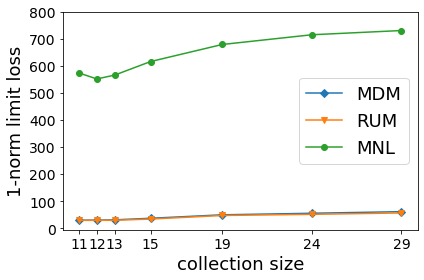

In [36]:
# limit summary 
collection_size = [len(offer_times_20),len(offer_times_30),len(offer_times_40),len(offer_times_50),len(offer_times_60),len(offer_times_75),len(offer_times_100)]
mdm_loss = merged_df['mdm_loss'].tolist()
rum_loss = merged_df['rum_loss'].tolist()
mnl_loss = merged_df['mnl_loss'].tolist()
plt.plot(collection_size,mdm_loss,'D-',label = 'MDM')
plt.plot(collection_size,rum_loss,'v-',label = 'RUM')
plt.plot(collection_size,mnl_loss,'o-',label = 'MNL')
x = collection_size
plt.xticks(x,x)
y = [0,100,200,300,400,500,600,700,800]
plt.yticks(y,y)
plt.tick_params(labelsize=14)
plt.xlabel('collection size',fontsize = 18)
plt.ylabel('1-norm limit loss',fontsize = 18)
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig('limit/summary/jd_limit_loss.png')
plt.savefig('limit/summary/jd_limit_loss.pdf')
plt.show()

In [60]:
def plot_limit_prob(collection,offertime):
    choice_data = pd.read_csv('instances/full_instances/full_'+str(offertime)+'.csv')
    mdm_soln = pd.read_csv('limit/probability/mdm/prob_offertimes'+str(offertime)+'.csv')
    rum_soln = pd.read_csv('limit/probability/rum/prob_offertimes'+str(offertime)+'.csv')
    mnl_soln = pd.read_csv('limit/probability/mnl/prob_offertimes'+str(offertime)+'.csv')

    choice_data = choice_data.drop(choice_data.columns[[0]], axis = 1)
    mdm_soln = mdm_soln.drop(mdm_soln.columns[[0]], axis = 1)
    rum_soln = rum_soln.drop(rum_soln.columns[[0]], axis = 1)
    mnl_soln = mnl_soln.drop(mnl_soln.columns[[0]], axis = 1)

    choice_data = np.array(choice_data)
    mdm_soln = np.array(mdm_soln)
    rum_soln = np.array(rum_soln)
    mnl_soln = np.array(mnl_soln)

    observed_prob = []
    mdm_prob = []
    rum_prob = []
    mnl_prob =[]
    ''' pre-processing data to list before scatters '''
    for i in range(len(collection)):
        for j in collection[i]:
            observed_prob.append(choice_data[j][i])
            mdm_prob.append(mdm_soln[j][i])
            rum_prob.append(rum_soln[j][i])
            mnl_prob.append(mnl_soln[j][i])
            
        
    ''' for i in range(choice_data.shape[0]):
        for j in range(choice_data.shape[1]):
            if choice_data[i][j] !=0:
                observed_prob.append(choice_data[i][j])
                mdm_prob.append(mdm_soln[i][j])
                rum_prob.append(rum_soln[i][j])
                mnl_prob.append(mnl_soln[i][j]) '''

    ''' plot the diagonal line '''
    x = np.arange(0,1,0.0001)
    from turtle import color
    plt.scatter(observed_prob, mdm_prob, marker='D', c='', edgecolors='blue',label='MDM')
    plt.scatter(observed_prob, rum_prob, marker='v', c='', edgecolors='red',label='RUM')
    plt.scatter(observed_prob, mnl_prob, marker='o', c='', edgecolors='purple',label='MNL')
    plt.plot(x,x,color='green')
    x = [0,0.2,0.5,0.8,1]
    plt.xticks(x,x)
    y = [0,0.2,0.5,0.8,1]
    plt.yticks(y,y)
    plt.tick_params(labelsize=18)
    #plt.xticks(x, names, rotation=45)
    #plt.xticks(x, names)
    plt.xlabel("observed "+"$p_{i,S}$",fontsize=25)  
    plt.ylabel("estimated "+"$p_{i,S}$",fontsize=25)  
    plt.title('limit probabilities with offertimes '+str(offertime),fontsize=15) 
    #plt.legend(loc='upper left',fontsize=20)
    if offertime == 20:
        plt.legend(fontsize=20)
    plt.tight_layout()  
    plt.savefig('limit/summary/limit_prob_plots/png/offertimes_'+str(offertime)+'.png')
    plt.savefig('limit/summary/limit_prob_plots/pdf/offertimes_'+str(offertime)+'.pdf')
    plt.show()

<ipython-input-60-0d9993d58371>:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mdm_prob, marker='D', c='', edgecolors='blue',label='MDM')
<ipython-input-60-0d9993d58371>:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, rum_prob, marker='v', c='', edgecolors='red',label='RUM')
<ipython-input-60-0d9993d58371>:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mnl_prob, marker='o', c='', edgecolors='purple',label='MNL')


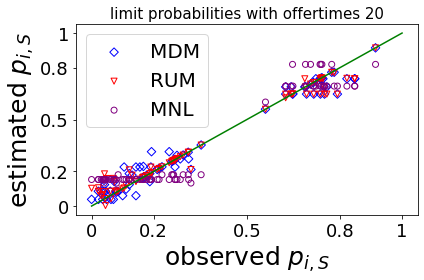

<ipython-input-60-0d9993d58371>:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mdm_prob, marker='D', c='', edgecolors='blue',label='MDM')
<ipython-input-60-0d9993d58371>:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, rum_prob, marker='v', c='', edgecolors='red',label='RUM')
<ipython-input-60-0d9993d58371>:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mnl_prob, marker='o', c='', edgecolors='purple',label='MNL')


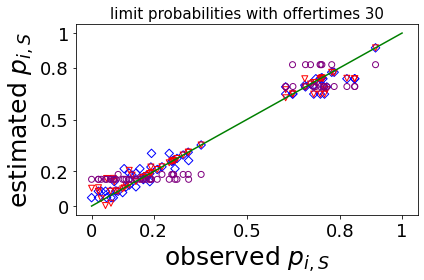

<ipython-input-60-0d9993d58371>:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mdm_prob, marker='D', c='', edgecolors='blue',label='MDM')
<ipython-input-60-0d9993d58371>:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, rum_prob, marker='v', c='', edgecolors='red',label='RUM')
<ipython-input-60-0d9993d58371>:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mnl_prob, marker='o', c='', edgecolors='purple',label='MNL')


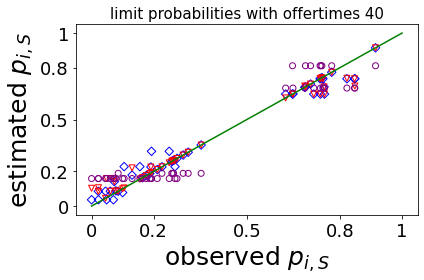

<ipython-input-60-0d9993d58371>:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mdm_prob, marker='D', c='', edgecolors='blue',label='MDM')
<ipython-input-60-0d9993d58371>:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, rum_prob, marker='v', c='', edgecolors='red',label='RUM')
<ipython-input-60-0d9993d58371>:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mnl_prob, marker='o', c='', edgecolors='purple',label='MNL')


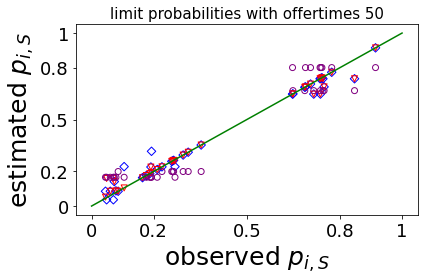

<ipython-input-60-0d9993d58371>:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mdm_prob, marker='D', c='', edgecolors='blue',label='MDM')
<ipython-input-60-0d9993d58371>:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, rum_prob, marker='v', c='', edgecolors='red',label='RUM')
<ipython-input-60-0d9993d58371>:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mnl_prob, marker='o', c='', edgecolors='purple',label='MNL')


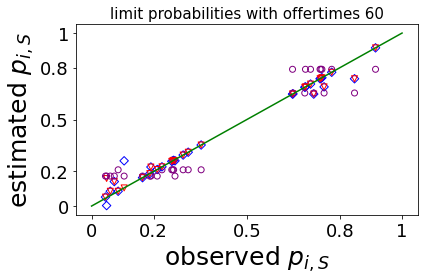

<ipython-input-60-0d9993d58371>:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mdm_prob, marker='D', c='', edgecolors='blue',label='MDM')
<ipython-input-60-0d9993d58371>:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, rum_prob, marker='v', c='', edgecolors='red',label='RUM')
<ipython-input-60-0d9993d58371>:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mnl_prob, marker='o', c='', edgecolors='purple',label='MNL')


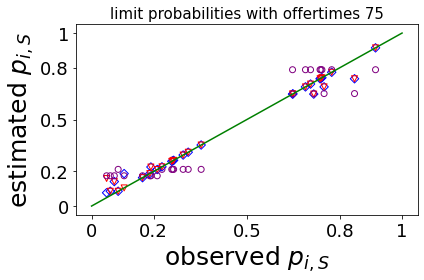

<ipython-input-60-0d9993d58371>:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mdm_prob, marker='D', c='', edgecolors='blue',label='MDM')
<ipython-input-60-0d9993d58371>:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, rum_prob, marker='v', c='', edgecolors='red',label='RUM')
<ipython-input-60-0d9993d58371>:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(observed_prob, mnl_prob, marker='o', c='', edgecolors='purple',label='MNL')


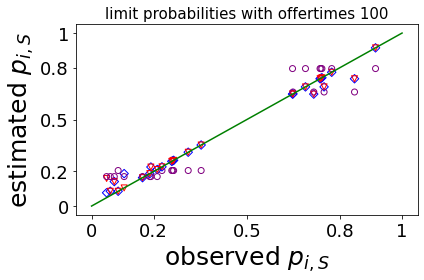

In [61]:
''' read data from records --  csv '''
all_collection = [collection_20,collection_30,collection_40,collection_50,collection_60,collection_75,collection_100]
for i in range(len(offertime_list)): 
    plot_limit_prob(all_collection[i],offertime_list[i])

prediction with MDM, RUM, and MNL

In [122]:
def kendall_tau_distance(values1, values2):
    """Compute the Kendall tau distance."""
    num = len(values1)
    assert len(values2) == num, "Both lists have to be of equal length"
    i, j = np.meshgrid(np.arange(num), np.arange(num))
    a = np.argsort(values1)
    b = np.argsort(values2)
    ndisordered = np.logical_or(np.logical_and(a[i] < a[j], b[i] > b[j]), np.logical_and(a[i] > a[j], b[i] < b[j])).sum()
    return ndisordered/2 

MDM prediction formulation with adding confidence interval 


In [179]:
def choose_z_score_for_MDMpred(curr_z,lb,ub,data, collection):
    
    n, m = data.shape

    prod_in_ass = [[] for _ in range(n)]
    for i, assort in enumerate(collection):
        for j in assort:
            prod_in_ass[j].append(i)

    eps = 0.00001

    model = gp.Model('mdm_z_value')
    model.setParam('OutputFlag', 0)
    lam = model.addVars(m, vtype=GRB.CONTINUOUS, lb=0.0, name="lam")
    x = model.addVars(n, m, vtype=GRB.CONTINUOUS, lb=0.0, name="x")
    delta = model.addVars(m, m, vtype=GRB.BINARY, name="delta")

    # Add constraints
    for j in range(m):
        model.addConstr(sum(x[i, j] for i in range(n)) == 1, name=f"normalization_{j}")

    for i in range(len(collection)):
        for j in range(n):
            if j not in collection[i]:
                model.addConstr(x[j, i] == 0, name=f"forcing_zero_{i}_{j}")
    
    for i in range(m):
        model.addConstr(lam[i] <= 1, name=f"lam_bound_{i}")

    for i in range(len(prod_in_ass)):
        if len(prod_in_ass[i]) > 0:
            for j in prod_in_ass[i]:
                for k in prod_in_ass[i]:
                    if j != k:
                        model.addConstr(lam[j] - lam[k] + delta[j, k] >= 0, name=f"pro_{i}_aspair_{j}_{k}")
                        model.addConstr(lam[j] - lam[k] - 1 + delta[j, k] + eps * delta[j, k] <= 0,
                                        name=f"pro_{i}_aspair_{j}_{k}")
                        model.addConstr(x[i, j] - x[i, k] - delta[j, k] + 1 >= 0,
                                        name=f"pro_{i}_aspair_{j}_{k}")
                        model.addConstr(x[i, j] - x[i, k] - 1 + delta[k, j] <= 0,
                                        name=f"pro_{i}_aspair_{i}_{j}_{k}")
                        model.addConstr(x[i, j] - x[i, k] + delta[j, k] + delta[k, j] >= 0,
                                        name=f"pro_{i}_aspair_{j}_{k}")
                        model.addConstr(x[i, j] - x[i, k] - delta[j, k] - delta[k, j] <= 0,
                                        name=f"ppro_{i}_aspair_{j}_{k}")
    for i in range(n):
        for j in range(m):
            if data[i, j] !=0:
                model.addConstr(x[i,j]>= lb[i,j])
                model.addConstr(x[i,j]<= ub[i,j])

    model.setObjective(0, GRB.MINIMIZE)

    # Set Gurobi parameters if needed
    model.optimize()

    if model.Status == GRB.OPTIMAL :
        print('Optimal solution found!')
        print(f'The z value for MDM prediction is {curr_z}')
        return [1, model.Runtime]
    else:
        return [-1, model.Runtime]

RUM prediction formulation with adding confidence interval 

In [170]:
def choose_z_score_for_RUMpred(curr_z,lb,ub,data,collection,perm_collection,produts_notin_collection):
    n,m = data.shape # number of products
    fact = math.factorial(n) # number of permutations
    
    model = gp.Model('rum_z_value') #define a model
    model.setParam('OutputFlag', 0)
    
    # define nonnegative continuous variables for lambda, the probability of each permutation
    lam = model.addVars(fact,lb=0.0, vtype=gp.GRB.CONTINUOUS, name='lam') 
    # define nonnegative continuous variables for choice probability of each product in each assortment
    x = model.addVars(n, m, vtype=gp.GRB.CONTINUOUS, lb=0.0, name="x") 
    
    #normalization constraint of lambda
    model.addConstr(sum(lam[i] for i in range(fact))==1)
    
    # caculate RUM choice probability for each product in the assortment
    for i in range(len(collection)):
        # normalization constraint for each assortment. 
        #model.addConstr(gp.quicksum(x[k, i] for k in collection[i]) == 1)
        for j in range(len(collection[i])):
            # constraints for RUM choice probabilities 
            model.addConstr(sum(lam[k] for k in perm_collection[i][j])- x[collection[i][j],i]==0)
            
            # constraints for the lower bound and upper bound values
            model.addConstr(x[collection[i][j],i]>= lb[collection[i][j],i])
            model.addConstr(x[collection[i][j],i]<= ub[collection[i][j],i])
        
        for k in produts_notin_collection[i]:
            # constraints for products that are not in the assortments
            model.addConstr(x[k,i] == 0)
    
    model.setObjective(0, sense=gp.GRB.MINIMIZE)
    #model.setObjective(0)
    model.optimize()
    status = model.status
    print("Gurobi optimization status:", status)
    # Access the optimal solution
    if model.status == gp.GRB.OPTIMAL:
        print('Optimal solution found!')
        print(f'The z value for RUM prediction is {curr_z}')
        x_values = [[x[i, j].X for j in range(m)] for i in range(n)]
        x_values = np.array(x_values)
        return [1,x_values,model.Runtime]
    else:
        print('No solution found or an error occurred.')
        return [-1]
    

In [178]:
confidence_level = [0.998,0.99,0.95,0.9,0.85,0.8]
alpha = np.ones(6) - confidence_level
# Find z-score for the given confidence level
z_score = stats.norm.ppf(1 - alpha / 2)

stardard_error_20 = np.zeros(frequency_collection_20.shape)
for i in range(stardard_error_20.shape[0]):
    for j in range(stardard_error_20.shape[1]):
        if frequency_collection_20[i][j]!=0:
            stardard_error_20[i][j] = np.sqrt((1-choice_collection_20[i][j])/frequency_collection_20[i][j])

# test for offertimes=20
target_z_rum = 0
for curr_z in z_score:
    lb_20 = np.zeros(frequency_collection_20.shape)
    ub_20 = np.zeros(frequency_collection_20.shape)
    for i in range(lb_20.shape[0]):
        for j in range(lb_20.shape[1]):
            if frequency_collection_20[i][j]!=0:
                lb_20[i][j] = choice_collection_20[i][j] * (1-curr_z*stardard_error_20[i][j]) 
                ub_20[i][j] = choice_collection_20[i][j] * (1+curr_z*stardard_error_20[i][j])
    element_indexes_20,perm_collection_20 = find_element_permutation_indexes(n, collection_20)
    products_notin_collection_20 = find_product_notin_assortment(collection_20,n)
    test_result = choose_z_score_for_RUMpred(curr_z,lb_20,ub_20,choice_collection_20,collection_20,perm_collection_20,products_notin_collection_20)
    if test_result[0] >0 :
        target_z_rum = curr_z
        break
        
print(target_z_rum)



Gurobi optimization status: 2
Optimal solution found!
The z value to use is 3.090232306167813
3.090232306167813


In [180]:
target_z_mdm = 0
for curr_z in z_score:
    lb_20 = np.zeros(frequency_collection_20.shape)
    ub_20 = np.zeros(frequency_collection_20.shape)
    for i in range(lb_20.shape[0]):
        for j in range(lb_20.shape[1]):
            if frequency_collection_20[i][j]!=0:
                lb_20[i][j] = choice_collection_20[i][j] * (1-curr_z*stardard_error_20[i][j]) 
                ub_20[i][j] = choice_collection_20[i][j] * (1+curr_z*stardard_error_20[i][j])
    
    test_result = choose_z_score_for_MDMpred(curr_z,lb_20,ub_20,choice_collection_20,collection_20)
    if test_result[0] >0 :
        target_z_mdm = curr_z
        break
        
print(target_z_mdm)

Optimal solution found!
The z value for MDM prediction is 3.090232306167813
3.090232306167813


In [188]:
confidence_level = 0.998
alpha = 1 - confidence_level
# Find z-score for the given confidence level
target_z_score = stats.norm.ppf(1 - alpha / 2)

stardard_error_20 = np.zeros(frequency_collection_20.shape)
for i in range(stardard_error_20.shape[0]):
    for j in range(stardard_error_20.shape[1]):
        if frequency_collection_20[i][j]!=0:
            stardard_error_20[i][j] = np.sqrt((1-choice_collection_20[i][j])/frequency_collection_20[i][j])
            
lb_20 = np.zeros(frequency_collection_20.shape)
ub_20 = np.zeros(frequency_collection_20.shape)
for i in range(lb_20.shape[0]):
    for j in range(lb_20.shape[1]):
        if frequency_collection_20[i][j]!=0:
            lb_20[i][j] = choice_collection_20[i][j] * (1-target_z_score*stardard_error_20[i][j]) 
            ub_20[i][j] = choice_collection_20[i][j] * (1+target_z_score*stardard_error_20[i][j])

stardard_error_30 = np.zeros(frequency_collection_30.shape)
for i in range(stardard_error_30.shape[0]):
    for j in range(stardard_error_30.shape[1]):
        if frequency_collection_30[i][j]!=0:
            stardard_error_30[i][j] = np.sqrt((1-choice_collection_30[i][j])/frequency_collection_30[i][j])
            
lb_30 = np.zeros(frequency_collection_30.shape)
ub_30 = np.zeros(frequency_collection_30.shape)
for i in range(lb_30.shape[0]):
    for j in range(lb_30.shape[1]):
        if frequency_collection_30[i][j]!=0:
            lb_30[i][j] = choice_collection_30[i][j] * (1-target_z_score*stardard_error_30[i][j]) 
            ub_30[i][j] = choice_collection_30[i][j] * (1+target_z_score*stardard_error_30[i][j])
            
stardard_error_40 = np.zeros(frequency_collection_40.shape)
for i in range(stardard_error_40.shape[0]):
    for j in range(stardard_error_40.shape[1]):
        if frequency_collection_40[i][j]!=0:
            stardard_error_40[i][j] = np.sqrt((1-choice_collection_40[i][j])/frequency_collection_40[i][j])
            
lb_40 = np.zeros(frequency_collection_40.shape)
ub_40 = np.zeros(frequency_collection_40.shape)
for i in range(lb_40.shape[0]):
    for j in range(lb_40.shape[1]):
        if frequency_collection_40[i][j]!=0:
            lb_40[i][j] = choice_collection_40[i][j] * (1-target_z_score*stardard_error_40[i][j]) 
            ub_40[i][j] = choice_collection_40[i][j] * (1+target_z_score*stardard_error_40[i][j])

stardard_error_50 = np.zeros(frequency_collection_50.shape)
for i in range(stardard_error_50.shape[0]):
    for j in range(stardard_error_50.shape[1]):
        if frequency_collection_50[i][j]!=0:
            stardard_error_50[i][j] = np.sqrt((1-choice_collection_50[i][j])/frequency_collection_50[i][j])
            
lb_50 = np.zeros(frequency_collection_50.shape)
ub_50 = np.zeros(frequency_collection_50.shape)
for i in range(lb_50.shape[0]):
    for j in range(lb_50.shape[1]):
        if frequency_collection_50[i][j]!=0:
            lb_50[i][j] = choice_collection_50[i][j] * (1-target_z_score*stardard_error_50[i][j]) 
            ub_50[i][j] = choice_collection_50[i][j] * (1+target_z_score*stardard_error_50[i][j])
            
stardard_error_60 = np.zeros(frequency_collection_60.shape)
for i in range(stardard_error_60.shape[0]):
    for j in range(stardard_error_60.shape[1]):
        if frequency_collection_60[i][j]!=0:
            stardard_error_60[i][j] = np.sqrt((1-choice_collection_60[i][j])/frequency_collection_60[i][j])
            
lb_60 = np.zeros(frequency_collection_60.shape)
ub_60 = np.zeros(frequency_collection_60.shape)
for i in range(lb_60.shape[0]):
    for j in range(lb_60.shape[1]):
        if frequency_collection_60[i][j]!=0:
            lb_60[i][j] = choice_collection_60[i][j] * (1-target_z_score*stardard_error_60[i][j]) 
            ub_60[i][j] = choice_collection_60[i][j] * (1+target_z_score*stardard_error_60[i][j])            


In [189]:
pred_offer_times_list = [20,30,40,50,60]
pred_full_instance  = [choice_collection_20,choice_collection_30,choice_collection_40,choice_collection_50,choice_collection_60]
pred_full_collection = [collection_20,collection_30,collection_40,collection_50,collection_60]
pred_full_collection_size = [len(offer_times_20),len(offer_times_30),len(offer_times_40),len(offer_times_50),len(offer_times_60)]
pred_test_collection_size = [5,4,3,3,2]
pred_train_collection_size = [24,20,16,12,11]
pred_instance_size = [100,100,100,50,50]
pred_full_lb = [lb_20,lb_30,lb_40,lb_50,lb_60]
pred_full_ub = [ub_20,ub_30,ub_40,ub_50,ub_60]

train-test split

In [190]:
np.random.seed(1)
random.seed(1)

In [ ]:
all_train_instances = []
all_train_collection = []
all_test_instance = []
all_test_collection = []
all_train_lb = []
all_train_ub = []

for i in range(len(pred_instance_size)):
    train_instances_collection = []
    train_collection = []
    train_lb_collection = []
    train_ub_collection = []
    
    test_instance_collection = []
    test_collection = []
    
    test_index_collection = []
    
    
    for j in range(pred_instance_size[i]):
        
        curr_train_instance = np.zeros((n,pred_train_collection_size[i]))
        curr_train_lb = np.zeros((n,pred_train_collection_size[i]))
        curr_train_ub = np.zeros((n,pred_train_collection_size[i]))
        
        curr_test_instance = np.zeros((n,pred_test_collection_size[i]))
        
        curr_train_collection = []
        curr_test_collection = []
        
        while(len(curr_train_collection)==0):
            
            chosen_test_idx = random.sample(range(len(pred_full_collection[i])),pred_test_collection_size[i])
            chosen_test_idx.sort()
            
            chosen_train_idx = [x for x in range(len(pred_full_collection[i])) if x not in chosen_test_idx ]
    
            for k in range(len(chosen_train_idx)):
                curr_train_collection.append(pred_full_collection[i][chosen_train_idx[k]])
                curr_train_instance[:,k] = pred_full_instance[i][:,chosen_train_idx[k]]
                curr_train_lb[:,k] = pred_full_lb[i][:,chosen_train_idx[k]]
                curr_train_ub[:,k] = pred_full_ub[i][:,chosen_train_idx[k]]
                
            for k in range(len(chosen_test_idx)):
                curr_test_collection.append(pred_full_collection[i][chosen_test_idx[k]])
                curr_test_instance[:,k] = pred_full_instance[i][:,chosen_test_idx[k]]
                
            ## check if the training instance includes all the testing products in the test instance
            # ensure each test product has been offered at least  once
            new_lst_train = sum(curr_train_collection,[])
            unique_numbers_train = list(set(new_lst_train)) 
            
            new_lst_test = sum(curr_test_collection,[])
            unique_numbers_test = list(set(new_lst_test)) 
            
            for num in unique_numbers_test:
                if num not in unique_numbers_train:
                    #print('the unique train numbers',unique_numbers_train)
                    #print('the unique test numbers',unique_numbers_test)
                    curr_train_collection = []
                    curr_test_collection = []
                    curr_train_instance = np.zeros((n,pred_train_collection_size[i]))
                    curr_test_instance = np.zeros((n,pred_test_collection_size[i]))
                    curr_train_lb = np.zeros((n,pred_train_collection_size[i]))
                    curr_train_ub = np.zeros((n,pred_train_collection_size[i]))
            if chosen_test_idx in test_index_collection:
                #print('check if exisits repeated indexes ')
                curr_train_collection = []
                curr_test_collection = []
                curr_train_instance = np.zeros((n,pred_train_collection_size[i]))
                curr_test_instance = np.zeros((n,pred_test_collection_size[i]))
                curr_train_lb = np.zeros((n,pred_train_collection_size[i]))
                curr_train_ub = np.zeros((n,pred_train_collection_size[i]))
            else:
                test_index_collection.append(chosen_test_idx)
        #print('chosen training indexes',chosen_train_idx)
        #print('chosen testing indexes',chosen_test_idx)
        #print('curr train collection\n',curr_train_collection)
        #print('curr test collection\n',curr_test_collection)
        df_train = pd.DataFrame(curr_train_instance)
        df_test = pd.DataFrame(curr_test_instance)
        #print('curr train instance\n',df_train)
        #print('curr test instance\n',df_test)
        
        ## output the training and testing instance
        df_train.to_csv('instances/train_instances/train_'+str(pred_offer_times_list[i])+'/train_offertimes'+str(pred_offer_times_list[i])+'_'+str(j)+'.csv')
        df_test.to_csv('instances/test_instances/test_'+str(pred_offer_times_list[i])+'/test_offertimes'+str(pred_offer_times_list[i])+'_'+str(j)+'.csv')
        

so we set both z = 3.090232306167813 for both RUM and MDM, which corresponding to approximate 99.8% confidence interval for the choice probability

In [ ]:
def robust_rum_prediction_w_ci(curr_z,lb,ub,data,collection,perm_collection,produts_notin_collection):
    n,m = data.shape # number of products
    fact = math.factorial(n) # number of permutations
    
    model = gp.Model('rum_ci') #define a model
    model.setParam('OutputFlag', 0)
    
    # define nonnegative continuous variables for lambda, the probability of each permutation
    lam = model.addVars(fact,lb=0.0, vtype=gp.GRB.CONTINUOUS, name='lam') 
    # define nonnegative continuous variables for choice probability of each product in each assortment
    x = model.addVars(n, m, vtype=gp.GRB.CONTINUOUS, lb=0.0, name="x") 
    
    #normalization constraint of lambda
    model.addConstr(sum(lam[i] for i in range(fact))==1)
    
    # caculate RUM choice probability for each product in the assortment
    for i in range(len(collection)):
        # normalization constraint for each assortment. 
        #model.addConstr(gp.quicksum(x[k, i] for k in collection[i]) == 1)
        for j in range(len(collection[i])):
            # constraints for RUM choice probabilities 
            model.addConstr(sum(lam[k] for k in perm_collection[i][j])- x[collection[i][j],i]==0)
            
            # constraints for the lower bound and upper bound values
            model.addConstr(x[collection[i][j],i]>= lb[collection[i][j],i])
            model.addConstr(x[collection[i][j],i]<= ub[collection[i][j],i])
        
        for k in produts_notin_collection[i]:
            # constraints for products that are not in the assortments
            model.addConstr(x[k,i] == 0)
    
    model.setObjective(0, sense=gp.GRB.MINIMIZE)
    #model.setObjective(0)
    model.optimize()
    status = model.status
    print("Gurobi optimization status:", status)
    # Access the optimal solution
    if model.status == gp.GRB.OPTIMAL:
        print('Optimal solution found!')
        print(f'The z value for RUM prediction is {curr_z}')
        x_values = [[x[i, j].X for j in range(m)] for i in range(n)]
        x_values = np.array(x_values)
        return [1,x_values,model.Runtime]
    else:
        print('No solution found or an error occurred.')
        return [-1]
    

In [ ]:
def robust_mdm_prediction_w_ci(lb,ub,data, collection, unseen_assortment, price,produts_notin_collection):
    
    eps = math.pow(10, -5)
    l = len(unseen_assortment)
    n, m = data.shape

    ind = [[] for i in range(n)]  ## keeps tracking of the assortments including product i 
    for i in range(len(collection)):
        for j in collection[i]:
            ind[j].append(i)  ## assortment i includes product j 

    # Create a Gurobi model
    model = gp.Model('mdm_ci')
    model.setParam('OutputFlag', 0)

    # Define variables
    x = model.addVars(l, vtype=GRB.CONTINUOUS, name="x", lb=0) # choice probabilities of unseen assortment
    y = model.addVars(n, m, vtype=gp.GRB.CONTINUOUS, lb=0, name="y") # define for the in sample choice probability
    delta_plus = model.addVars(m, vtype=GRB.BINARY, name="delta_plus") # delta_{A,S}
    delta_minu = model.addVars(m, vtype=GRB.BINARY, name="delta_minu") # delta_{S,A}
    eta = model.addVar(lb=0, name="eta") # lambda_A 
    lam = model.addVars(m, lb=0, vtype=GRB.CONTINUOUS, name="lam") # lambda_S for all S in the collection

    # Normalization constraints of unseen assortment and bound on the lambda(A)
    model.addConstr(gp.quicksum(x[i] for i in range(l)) == 1, name="Normalization")
    model.addConstr(eta <= 1, name="Eta_Bound")

    # Out-of-sample MDM consistency
    for k in range(len(unseen_assortment)):
        for i in ind[unseen_assortment[k]]:
            model.addConstr(eta - lam[i] + delta_plus[i] >= 0, name=f"Cons1_{k}_{i}")
            model.addConstr(eta - lam[i] - 1 + delta_plus[i] + eps * delta_plus[i] <= 0, name=f"Cons2_{k}_{i}")
            
            model.addConstr(lam[i] - eta + delta_minu[i] >= 0, name=f"Cons3_{k}_{i}")
            model.addConstr(lam[i] - eta - 1 + delta_minu[i] + eps * delta_minu[i] <= 0, name=f"Cons4_{k}_{i}")
            
            model.addConstr(x[k] - y[unseen_assortment[k],i] - delta_plus[i] + 1 >= 0, name=f"Cons5_{k}_{i}")
            model.addConstr(x[k] - y[unseen_assortment[k],i]  + delta_minu[i] - 1 <= 0, name=f"Cons6_{k}_{i}")
            
            model.addConstr(x[k] - y[unseen_assortment[k],i]  + delta_plus[i] + delta_minu[i] >= 0,
                            name=f"Cons7_{k}_{i}")
            model.addConstr(x[k] - y[unseen_assortment[k],i]  - delta_plus[i] - delta_minu[i] <= 0,
                            name=f"Cons8_{k}_{i}")

    # In-sample MDM choice probability lies in the confidence interval
    for i in range(len(collection)):
        # normalization constraint for each assortment. 
        #model.addConstr(gp.quicksum(x[k, i] for k in collection[i]) == 1)
        for j in range(len(collection[i])):
            # constraints for the lower bound and upper bound values
            model.addConstr(y[collection[i][j],i]>= lb[collection[i][j],i])
            model.addConstr(y[collection[i][j],i]<= ub[collection[i][j],i])
        
        for k in produts_notin_collection[i]:
            # constraints for products that are not in the assortments
            model.addConstr(y[k,i] == 0)

    # Bounds for lambda
    for i in range(m):
        model.addConstr(lam[i] <= 1, name=f"Lambda_Bound_{i}")

    # Objective
    obj = gp.quicksum(price[unseen_assortment[i]] * x[i] for i in range(l))
    model.setObjective(obj, GRB.MINIMIZE)

    # Optimize the model
    model.optimize()
    status = model.status
    print("Gurobi optimization status:", status)
    # Access the optimal solution
    if model.status == gp.GRB.OPTIMAL:
        model.write("mdmPrediction_min_out.sol")
        model.write("mdmPrediction_min_model.lp") 
        return [model.objVal, [x[i].x for i in range(l)], [lam[i].x for i in range(m)], eta.x, model.Runtime]
    else:
        print('No solution found or an error occurred.')
        print('write the model')

    ''' # Display the results
    print("Optimal value:", model.objVal)
    print("Optimal x:", [x[i].x for i in range(l)])
    print("Optimal lam:", [lam[i].x for i in range(m)])
    print("Optimal eta:", eta.x) '''

    

In [ ]:
def best_case_mdm_prediction_w_ci(lb,ub,data, collection, unseen_assortment, price,produts_notin_collection):
    
    eps = math.pow(10, -5)
    l = len(unseen_assortment)
    n, m = data.shape

    ind = [[] for i in range(n)]  ## keeps tracking of the assortments including product i 
    for i in range(len(collection)):
        for j in collection[i]:
            ind[j].append(i)  ## assortment i includes product j 

    # Create a Gurobi model
    model = gp.Model('mdm_ci')
    model.setParam('OutputFlag', 0)

    # Define variables
    x = model.addVars(l, vtype=GRB.CONTINUOUS, name="x", lb=0) # choice probabilities of unseen assortment
    y = model.addVars(n, m, vtype=gp.GRB.CONTINUOUS, lb=0, name="y") # define for the in sample choice probability
    delta_plus = model.addVars(m, vtype=GRB.BINARY, name="delta_plus") # delta_{A,S}
    delta_minu = model.addVars(m, vtype=GRB.BINARY, name="delta_minu") # delta_{S,A}
    eta = model.addVar(lb=0, name="eta") # lambda_A 
    lam = model.addVars(m, lb=0, vtype=GRB.CONTINUOUS, name="lam") # lambda_S for all S in the collection

    # Normalization constraints of unseen assortment and bound on the lambda(A)
    model.addConstr(gp.quicksum(x[i] for i in range(l)) == 1, name="Normalization")
    model.addConstr(eta <= 1, name="Eta_Bound")

    # Out-of-sample MDM consistency
    for k in range(len(unseen_assortment)):
        for i in ind[unseen_assortment[k]]:
            model.addConstr(eta - lam[i] + delta_plus[i] >= 0, name=f"Cons1_{k}_{i}")
            model.addConstr(eta - lam[i] - 1 + delta_plus[i] + eps * delta_plus[i] <= 0, name=f"Cons2_{k}_{i}")
            
            model.addConstr(lam[i] - eta + delta_minu[i] >= 0, name=f"Cons3_{k}_{i}")
            model.addConstr(lam[i] - eta - 1 + delta_minu[i] + eps * delta_minu[i] <= 0, name=f"Cons4_{k}_{i}")
            
            model.addConstr(x[k] - y[unseen_assortment[k],i] - delta_plus[i] + 1 >= 0, name=f"Cons5_{k}_{i}")
            model.addConstr(x[k] - y[unseen_assortment[k],i]  + delta_minu[i] - 1 <= 0, name=f"Cons6_{k}_{i}")
            
            model.addConstr(x[k] - y[unseen_assortment[k],i]  + delta_plus[i] + delta_minu[i] >= 0,
                            name=f"Cons7_{k}_{i}")
            model.addConstr(x[k] - y[unseen_assortment[k],i]  - delta_plus[i] - delta_minu[i] <= 0,
                            name=f"Cons8_{k}_{i}")

    # In-sample MDM choice probability lies in the confidence interval
    for i in range(len(collection)):
        # normalization constraint for each assortment. 
        #model.addConstr(gp.quicksum(x[k, i] for k in collection[i]) == 1)
        for j in range(len(collection[i])):
            # constraints for the lower bound and upper bound values
            model.addConstr(y[collection[i][j],i]>= lb[collection[i][j],i])
            model.addConstr(y[collection[i][j],i]<= ub[collection[i][j],i])
        
        for k in produts_notin_collection[i]:
            # constraints for products that are not in the assortments
            model.addConstr(y[k,i] == 0)

    # Bounds for lambda
    for i in range(m):
        model.addConstr(lam[i] <= 1, name=f"Lambda_Bound_{i}")

    # Objective
    obj = gp.quicksum(price[unseen_assortment[i]] * x[i] for i in range(l))
    model.setObjective(obj, GRB.MAXIMIZE)

    # Optimize the model
    model.optimize()
    status = model.status
    print("Gurobi optimization status:", status)
    # Access the optimal solution
    if model.status == gp.GRB.OPTIMAL:
        model.write("mdmPrediction_min_out.sol")
        model.write("mdmPrediction_min_model.lp") 
        return [model.objVal, [x[i].x for i in range(l)], [lam[i].x for i in range(m)], eta.x, model.Runtime]
    else:
        print('No solution found or an error occurred.')
        print('write the model')

    ''' # Display the results
    print("Optimal value:", model.objVal)
    print("Optimal x:", [x[i].x for i in range(l)])
    print("Optimal lam:", [lam[i].x for i in range(m)])
    print("Optimal eta:", eta.x) '''


MNL prediction with MLE 